<a href="https://colab.research.google.com/github/hyhy-j/google_colab_subway/blob/main/%EA%B5%AC%EA%B8%80%EC%BD%94%EB%9E%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E: Invalid operation updqte
Selecting previously unselected package fonts-nanum.
(Reading database ... 120872 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


<ipython-input-2-b014887a91da>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  metro_line = metro_recent.groupby(['호선명']).mean().reset_index()


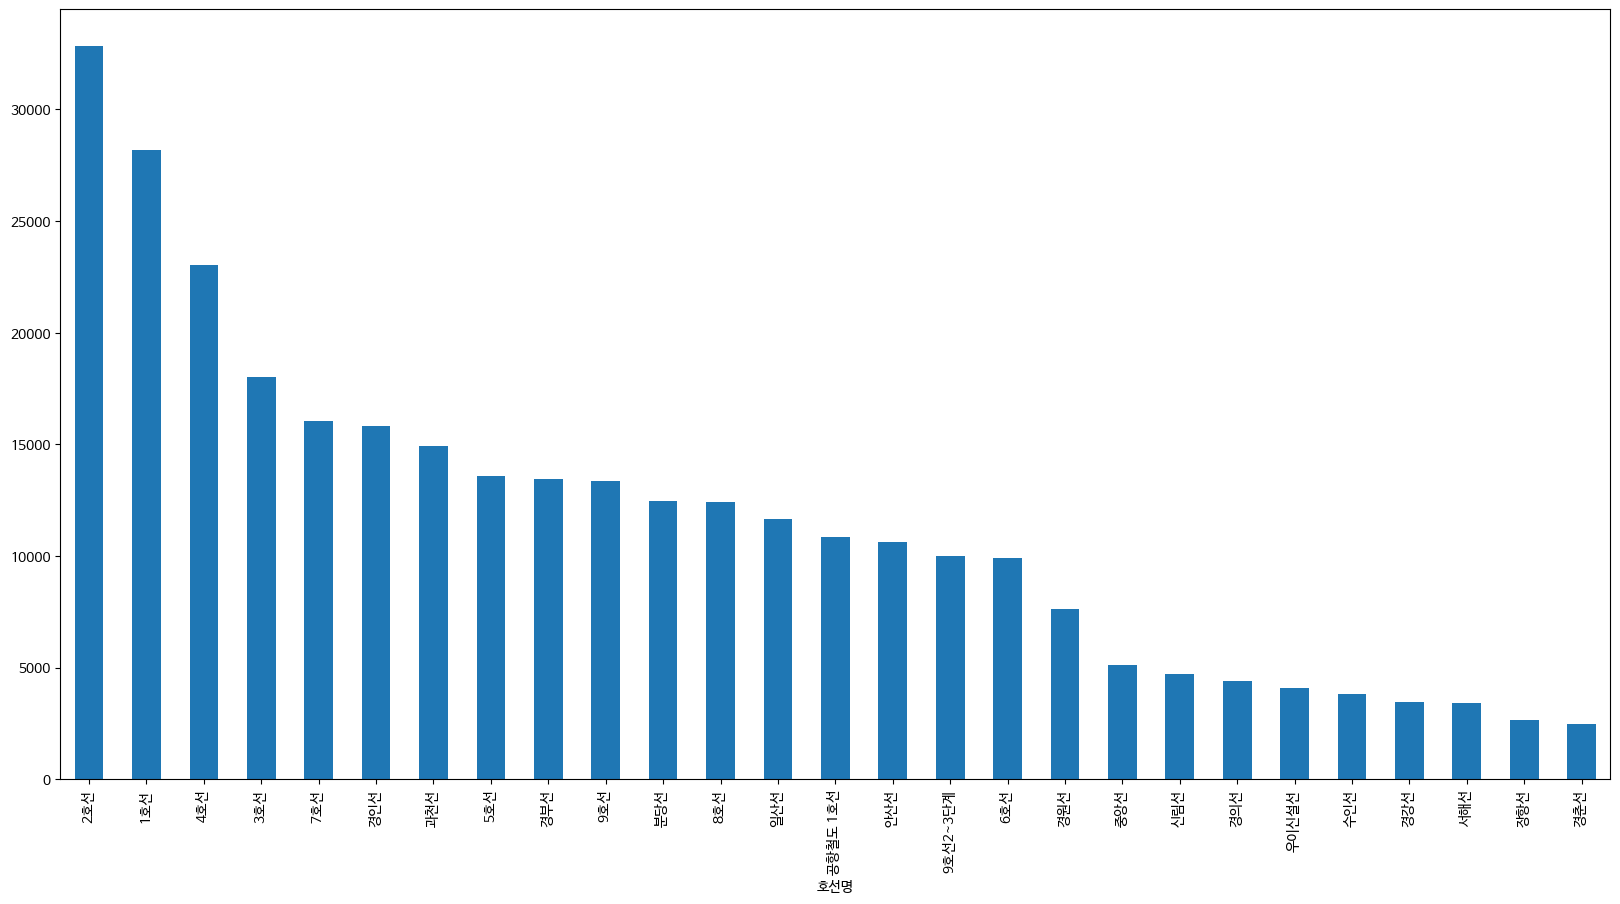

In [ ]:
from pandas.core.reshape import encoding
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm # 공식적으로 알려진 한글 사용방법, 폰트 관련용도

!apt-get updqte -qq
!apt-get install fonts-nanum* -qq
# 파일 가져오기
metro_all = pd.read_csv("서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv", encoding = 'cp949')
# 데이터 읽기

#metro_all.head()
#metro_all.info()

sorted(list(set(metro_all['사용월'])))
sorted(list(set(metro_all['호선명'])))
sorted(list(set(metro_all['지하철역'])))
len(list(set(metro_all['지하철역'])))

# 데이터 정제
metro_recent = metro_all[metro_all['사용월']==202308]
metro_recent

metro_recent = metro_recent.drop(columns='작업일자')
metro_recent

font_dirs = ['/usr/share/fonts/truetype/nanum',]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  fm.fontManager.addfont(font_file)

metro_line = metro_recent.groupby(['호선명']).mean().reset_index()

metro_line = metro_line.drop(columns='사용월').set_index('호선명') #drop 선택한 행 열을 삭제한 새로운 객체 생성
metro_line = metro_line.mean(axis=1).sort_values(ascending=False)

plt.figure(figsize=(20,10))
plt.rc('font', family = "NanumBarunGothic")
plt.rcParams['axes.unicode_minus'] = False

metro_line.plot(kind=('bar'))
plt.show()

In [ ]:
subway = pd.read_excel("subway_location.xlsx")
#subway_two = subway[subway["line"]=='"02호선"']
subway

,line,name,code,lat,lng
0,02호선,강남,222,37.497175,127.027926
1,02호선,강변,214,37.535095,127.094681
2,02호선,건대입구,212,37.540693,127.070230
3,02호선,교대,223,37.493415,127.014080
4,02호선,구로디지털단지,232,37.485266,126.901401
...,...,...,...,...,...
71,04호선,총신대입구,432,37.486263,126.981989
72,04호선,충무로,423,37.561243,126.994280
73,04호선,한성대입구,419,37.588458,127.006221
74,04호선,혜화,420,37.582336,127.001844


In [ ]:
line='2호선'
line4 = '4호선'
metro_st = metro_recent.groupby(['호선명', '지하철역']).mean().reset_index()
metro_st_line2 = metro_st.loc[(metro_st['호선명']==line) | (metro_st['호선명'] == line4)]
metro_st_line2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,202308.0,112.0,5.0,8536.0,11391.0,18206.0,55048.0,39744.0,...,72928.0,22668.0,12953.0,6403.0,2.0,47.0,0.0,0.0,0.0,0.0
11,2호선,강변(동서울터미널),202308.0,34.0,0.0,8883.0,2143.0,28090.0,22069.0,77944.0,...,7969.0,20929.0,1066.0,5315.0,0.0,0.0,0.0,0.0,0.0,0.0
12,2호선,건대입구,202308.0,251.0,4.0,16067.0,1826.0,22568.0,15235.0,53762.0,...,41990.0,29979.0,7222.0,10552.0,6.0,760.0,0.0,0.0,0.0,0.0
13,2호선,교대(법원.검찰청),202308.0,13.0,2.0,2711.0,6979.0,11439.0,25958.0,24763.0,...,15047.0,11461.0,3161.0,3045.0,0.0,2.0,0.0,0.0,0.0,0.0
14,2호선,구로디지털단지,202308.0,379.0,20.0,36920.0,5366.0,53742.0,20225.0,142411.0,...,17750.0,46517.0,3204.0,13841.0,2.0,179.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,4호선,총신대입구(이수),202308.0,106.0,4.0,6383.0,814.0,17691.0,9642.0,47229.0,...,7612.0,12598.0,903.0,3029.0,2.0,526.0,0.0,1.0,0.0,0.0
116,4호선,충무로,202308.0,87.0,5.0,3327.0,3062.0,5534.0,23529.0,11572.0,...,17575.0,11365.0,3324.0,3629.0,0.0,143.0,0.0,0.0,0.0,0.0
117,4호선,한성대입구(삼선교),202308.0,42.0,1.0,6934.0,1316.0,12872.0,7452.0,29797.0,...,3996.0,10766.0,605.0,4681.0,2.0,1493.0,0.0,0.0,0.0,0.0
118,4호선,혜화,202308.0,17.0,0.0,3580.0,2302.0,7968.0,23826.0,17680.0,...,28960.0,10545.0,3804.0,3267.0,0.0,315.0,0.0,0.0,0.0,0.0


In [ ]:
#승차 인원 컬럼 추출
metro_get_on = pd.DataFrame()
metro_get_on['지하철역'] = metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
  metro_get_on[metro_st_line2.columns[3+2*i]] = metro_st_line2[metro_st_line2.columns[3+2*i]]
metro_get_on = metro_get_on.set_index('지하철역')
metro_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,112.0,8536.0,18206.0,39744.0,62774.0,50894.0,51657.0,67996.0,86613.0,102025.0,...,325844.0,208701.0,162014.0,182654.0,163833.0,72928.0,12953.0,2.0,0.0,0.0
강변(동서울터미널),34.0,8883.0,28090.0,77944.0,113417.0,82099.0,62917.0,54435.0,49982.0,47757.0,...,60024.0,42475.0,34245.0,28199.0,20093.0,7969.0,1066.0,0.0,0.0,0.0
건대입구,251.0,16067.0,22568.0,53762.0,90068.0,60763.0,38018.0,35693.0,40641.0,43027.0,...,83272.0,62514.0,63276.0,68918.0,68797.0,41990.0,7222.0,6.0,0.0,0.0
교대(법원.검찰청),13.0,2711.0,11439.0,24763.0,35846.0,27275.0,25281.0,29972.0,33105.0,39515.0,...,134561.0,61971.0,50687.0,51332.0,40243.0,15047.0,3161.0,0.0,0.0,0.0
구로디지털단지,379.0,36920.0,53742.0,142411.0,183072.0,110408.0,66981.0,57659.0,62786.0,62953.0,...,210025.0,101767.0,63610.0,53387.0,39914.0,17750.0,3204.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
총신대입구(이수),106.0,6383.0,17691.0,47229.0,57870.0,35745.0,26878.0,25892.0,27618.0,28113.0,...,42881.0,25531.0,22994.0,19748.0,16626.0,7612.0,903.0,2.0,0.0,0.0
충무로,87.0,3327.0,5534.0,11572.0,19417.0,23963.0,27053.0,30579.0,30670.0,35375.0,...,145696.0,64865.0,47579.0,44841.0,34421.0,17575.0,3324.0,0.0,0.0,0.0
한성대입구(삼선교),42.0,6934.0,12872.0,29797.0,35538.0,25368.0,19319.0,18392.0,21776.0,21530.0,...,29041.0,16623.0,14452.0,13174.0,9556.0,3996.0,605.0,2.0,0.0,0.0


In [ ]:
#하차 인원 컬럼 추출
metro_get_off = pd.DataFrame()
metro_get_off['지하철역'] = metro_st_line2['지하철역']
for i in range(int((len(metro_recent.columns)-3)/2)):
  metro_get_off[metro_st_line2.columns[4+2*i]] = metro_st_line2[metro_st_line2.columns[4+2*i]]
metro_get_off = metro_get_off.set_index('지하철역')
metro_get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,5.0,11391.0,55048.0,156616.0,308248.0,310450.0,152592.0,107871.0,100304.0,115982.0,...,176501.0,103275.0,56072.0,45611.0,38530.0,22668.0,6403.0,47.0,0.0,0.0
강변(동서울터미널),0.0,2143.0,22069.0,24716.0,44788.0,38082.0,37073.0,34400.0,39033.0,42081.0,...,109698.0,74212.0,52055.0,42809.0,41594.0,20929.0,5315.0,0.0,0.0,0.0
건대입구,4.0,1826.0,15235.0,24103.0,59208.0,50260.0,41372.0,44901.0,50258.0,55651.0,...,147860.0,101093.0,63087.0,57122.0,51607.0,29979.0,10552.0,760.0,0.0,0.0
교대(법원.검찰청),2.0,6979.0,25958.0,60225.0,158464.0,135382.0,65740.0,54055.0,50087.0,53278.0,...,70404.0,40886.0,24807.0,22630.0,21465.0,11461.0,3045.0,2.0,0.0,0.0
구로디지털단지,20.0,5366.0,20225.0,85088.0,229151.0,141119.0,60298.0,43157.0,45594.0,55417.0,...,164541.0,130053.0,85564.0,83372.0,78218.0,46517.0,13841.0,179.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
총신대입구(이수),4.0,814.0,9642.0,17852.0,42471.0,30415.0,24452.0,23961.0,25215.0,28066.0,...,76060.0,48283.0,27845.0,24825.0,21340.0,12598.0,3029.0,526.0,1.0,0.0
충무로,5.0,3062.0,23529.0,60333.0,175722.0,93366.0,48860.0,41766.0,40230.0,41775.0,...,45671.0,29059.0,19047.0,18827.0,17059.0,11365.0,3629.0,143.0,0.0,0.0
한성대입구(삼선교),1.0,1316.0,7452.0,15778.0,27492.0,23774.0,17602.0,16815.0,17369.0,18153.0,...,35976.0,28142.0,18506.0,17878.0,17191.0,10766.0,4681.0,1493.0,0.0,0.0


In [ ]:
#역 별 평균 승하차 인원을 구한 후 정수형으로 데이터프레임 저장
df = pd.DataFrame(index = metro_st_line2['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,95259,91673
강변(동서울터미널),37979,36176
건대입구,42600,45668
교대(법원.검찰청),34987,41676
구로디지털단지,66587,66013
...,...,...
총신대입구(이수),22011,23848
충무로,32713,33985
한성대입구(삼선교),15869,15259


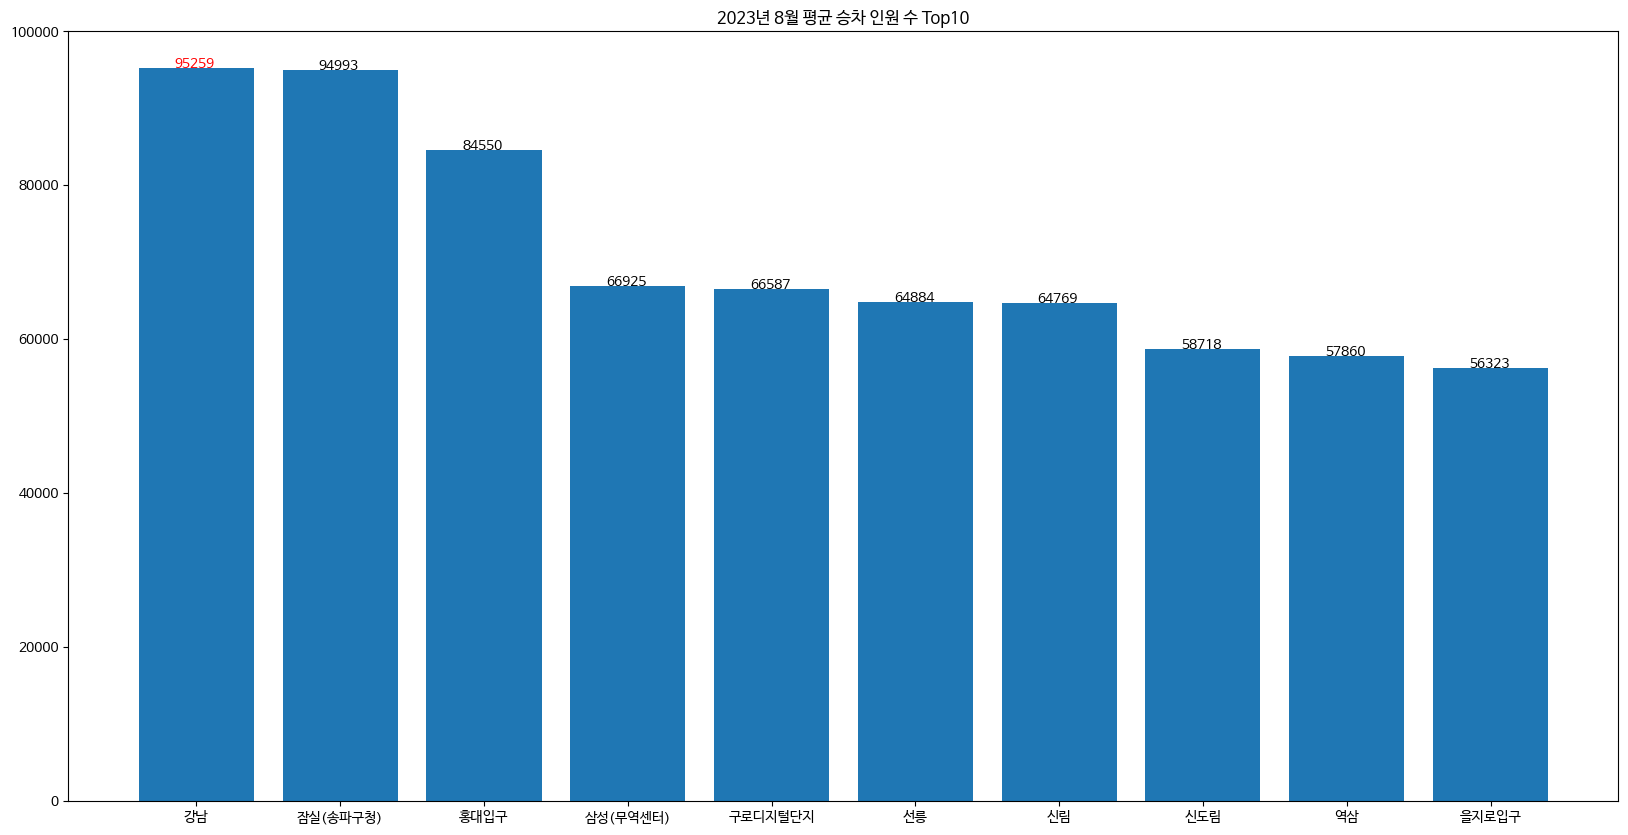

In [ ]:
#승차 인원 수 top10
top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x,y in enumerate(list(top10_on['평균 승차 인원 수'])):
  if x==0:
    plt.annotate(y, (x-0.15,y), color = 'red')
  else:
    plt.annotate(y,(x-0.15,y))
plt.title('2023년 8월 평균 승차 인원 수 Top10')
plt.show()

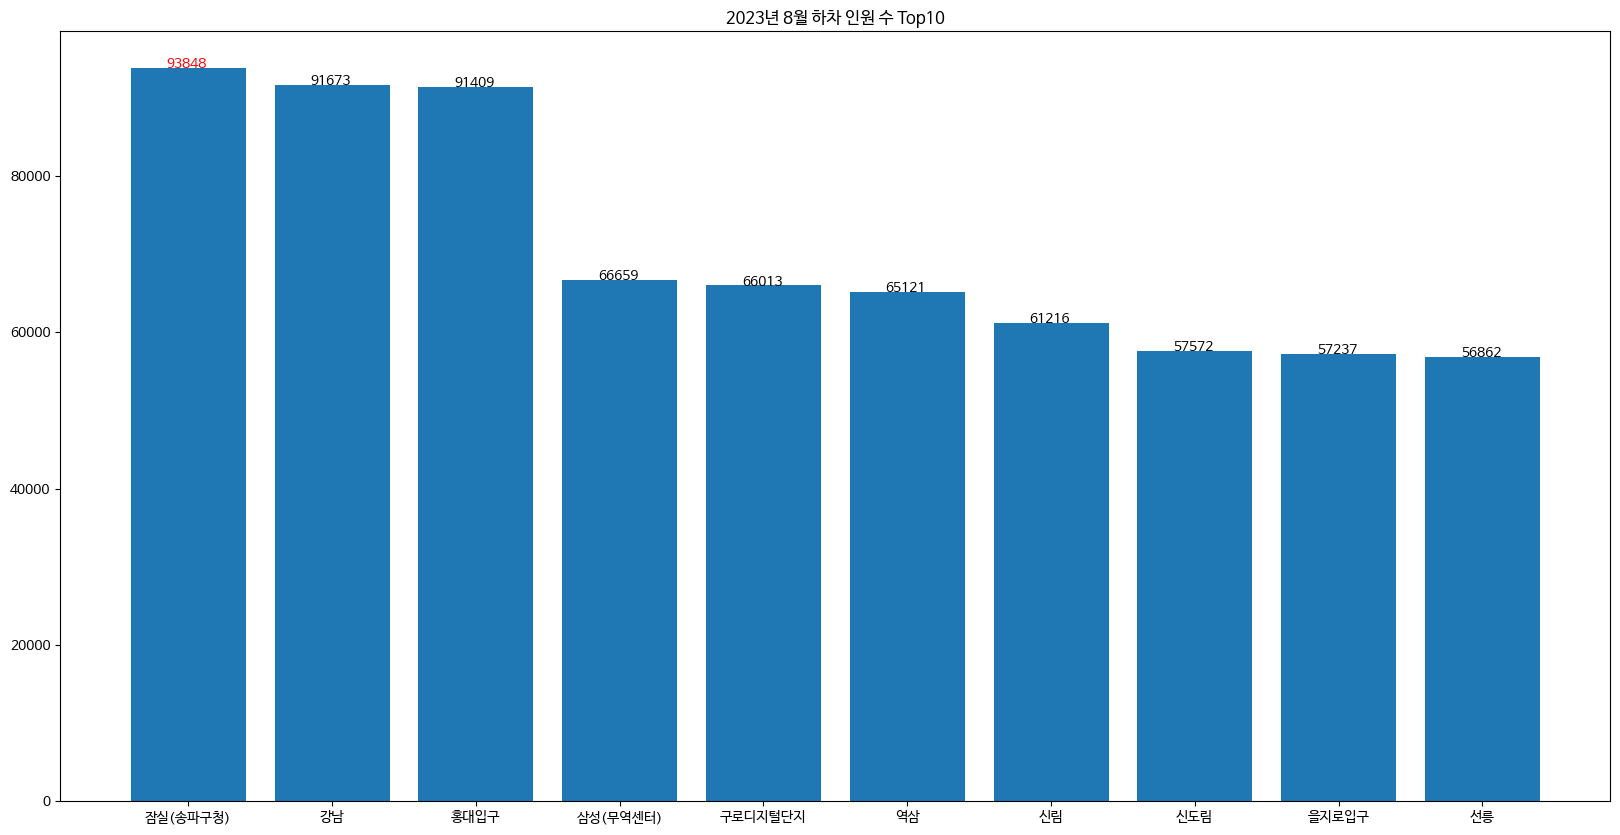

In [ ]:
#하차 인원 수 top10
top10_off = df.sort_values(by='평균 하차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))
plt.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.bar(top10_off.index, top10_off['평균 하차 인원 수'])
for x,y in enumerate(list(top10_off['평균 하차 인원 수'])):
  if x== 0:
    plt.annotate(y,(x-0.15,y),color='red')
  else:
    plt.annotate(y, (x-0.15,y))

plt.title('2023년 8월 하차 인원 수 Top10')
plt.show()

In [ ]:
#subway_location = pd.read_csv('./data/지하철 역 위치 좌표.csv')
import folium
subway_location = folium.Map(location= [37.55150856270673,126.95402598302076], zoom_start=12)

def get_nums_and_location(line,metro_st):
  metro_line_n = metro_st[metro_st['호선명']==line]

  metro_get_on = pd.DataFrame()
  metro_get_on['지하철역'] = metro_line_n['지하철역']
  for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_on[metro_line_n.columns[3+2*i]] = metro_line_n[metro_line_n.columns[3+2*i]]
  metro_get_on = metro_get_on.set_index('지하철역')

  metro_get_off = pd.DataFrame()
  metro_get_off['지하철역'] = metro_line_n['지하철역']
  for i in range(int((len(metro_recent.columns)-3)/2)):
    metro_get_off[metro_line_n.columns[4+2*i]] = metro_line_n[metro_line_n.columns[4+2*i]]
  metro_get_off = metro_get_off.set_index('지하철역')

  df = pd.DataFrame(index = metro_line_n['지하철역'])
  df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
  df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)

  temp=[]
  df = df.reset_index()
  for name in df['지하철역']:
    temp.append(name.split('(')[0]+'역')
  df['지하철역'] = temp

  return df


In [ ]:
rail = '2호선'
rail4 = '4호선'
df = get_nums_and_location(rail,metro_st)
df2 = get_nums_and_location(rail4, metro_st)

#latitude = subway_location[subway_location['지하철역']=='명동역']['x좌표']
#longitude = subway_location[subway_location['지하철역']=='명동역']['y좌표']
#map_osm = folium.Map(location = [latitude, longitude], zoom_start=12

for i in df.index:
  marker = folium.CircleMarker([subway['lat'][i], subway['lng'][i]],
  radius = (df['평균 승차 인원 수'][i]+1)/3000,
  popup = [df['지하철역'][i],df['평균 승차 인원 수'][i]],
  color = 'green',
  fill_color = 'green')

  marker.add_to(subway_location)

for i in df2.index:
  marker = folium.CircleMarker([subway['lat'][i+50], subway['lng'][i+50]],
  radius = (df2['평균 승차 인원 수'][i]+1)/3000,
  popup = [df2['지하철역'][i],df2['평균 승차 인원 수'][i]],
  color = 'blue',
  fill_color = 'blue')

  marker.add_to(subway_location)

subway_location